# EDA (Exploratory Data Analysis)

In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/yakou/Downloads/railway.csv", sep=';')  # read the data 
print(df.head())
print(df.info())


            Transaction ID Date of Purchase Time of Purchase Purchase Type  \
0  da8a6ba8-b3dc-4677-b176       08/12/2023         12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       16/12/2023         11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       19/12/2023         19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       20/12/2023         23:00:36       Station   
4  2be00b45-0762-485e-a7a3       27/12/2023         18:22:56        Online   

  Payment Method Railcard Ticket Class Ticket Type  Price  \
0    Contactless    Adult     Standard     Advance     43   
1    Credit Card    Adult     Standard     Advance     23   
2    Credit Card     None     Standard     Advance      3   
3    Credit Card     None     Standard     Advance     13   
4    Contactless     None     Standard     Advance     76   

       Departure Station    Arrival Destination Date of Journey  \
0      London Paddington  Liverpool Lime Street      01/01/2024   
1     London Kings Cross      

In [3]:
# Dataset shape
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Data types
print(df.dtypes)

# Summary stats for numeric fields
print(df.describe())


Shape: (31653, 18)
Columns: ['Transaction ID', 'Date of Purchase', 'Time of Purchase', 'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class', 'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination', 'Date of Journey', 'Departure Time', 'Arrival Time', 'Actual Arrival Time', 'Journey Status', 'Reason for Delay', 'Refund Request']
Transaction ID         object
Date of Purchase       object
Time of Purchase       object
Purchase Type          object
Payment Method         object
Railcard               object
Ticket Class           object
Ticket Type            object
Price                   int64
Departure Station      object
Arrival Destination    object
Date of Journey        object
Departure Time         object
Arrival Time           object
Actual Arrival Time    object
Journey Status         object
Reason for Delay       object
Refund Request         object
dtype: object
              Price
count  31653.000000
mean      23.439200
std       29.997628
min        1.000

In [4]:
# Unique Values in Each Column
print(df.isnull().sum())        # Pandas NaNs
print((df == '').sum())         # Empty strings


Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard                   0
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64
Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Reason for Delay       0
Refund Request         0
dtype: int64


In [5]:
# Unique Values in Each Column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Transaction ID: 31653 unique values
Date of Purchase: 128 unique values
Time of Purchase: 24351 unique values
Purchase Type: 2 unique values
Payment Method: 3 unique values
Railcard: 4 unique values
Ticket Class: 2 unique values
Ticket Type: 3 unique values
Price: 125 unique values
Departure Station: 12 unique values
Arrival Destination: 32 unique values
Date of Journey: 121 unique values
Departure Time: 96 unique values
Arrival Time: 203 unique values
Actual Arrival Time: 623 unique values
Journey Status: 3 unique values
Reason for Delay: 8 unique values
Refund Request: 2 unique values


In [6]:
# Value Counts for Categorical Columns
print(df['Purchase Type'].value_counts())
print(df['Payment Method'].value_counts())
print(df['Ticket Type'].value_counts())
print(df['Journey Status'].value_counts())
print(df['Reason for Delay'].value_counts())


Online     18521
Station    13132
Name: Purchase Type, dtype: int64
Credit Card    19136
Contactless    10834
Debit Card      1683
Name: Payment Method, dtype: int64
Advance     17561
Off-Peak     8752
Anytime      5340
Name: Ticket Type, dtype: int64
On Time      27481
Delayed       2292
Cancelled     1880
Name: Journey Status, dtype: int64
Weather               995
Technical Issue       707
Signal Failure        523
Signal failure        447
Staffing              410
Staff Shortage        399
Weather Conditions    377
Traffic               314
Name: Reason for Delay, dtype: int64


In [7]:
#Top Departure and Arrival Stations
print(df['Departure Station'].value_counts().head(10))
print(df['Arrival Destination'].value_counts().head(10))


Manchester Piccadilly    5650
London Euston            4954
Liverpool Lime Street    4561
London Paddington        4500
London Kings Cross       4229
London St Pancras        3891
Birmingham New Street    2136
York                      927
Reading                   594
Oxford                    144
Name: Departure Station, dtype: int64
Birmingham New Street    7742
Liverpool Lime Street    5022
York                     4019
Manchester Piccadilly    3968
Reading                  3920
London Euston            1567
London St Pancras         749
Oxford                    623
London Paddington         351
Leicester                 337
Name: Arrival Destination, dtype: int64


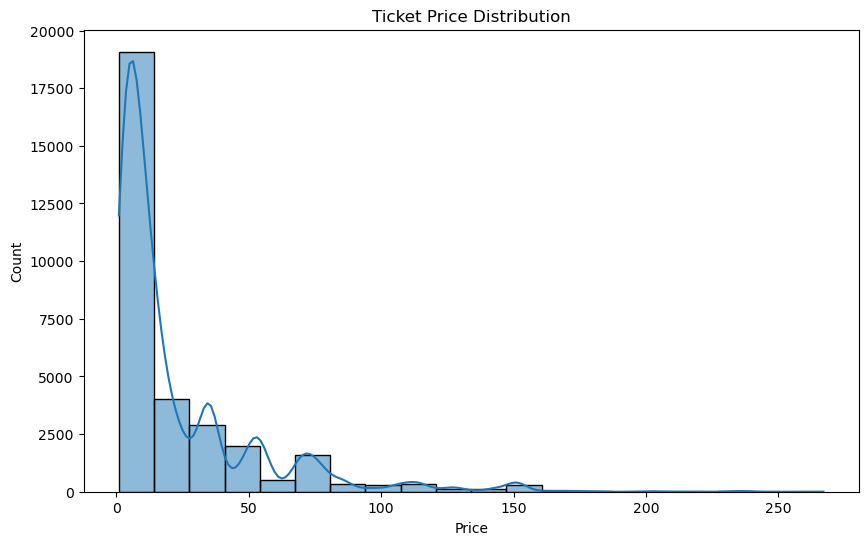

In [8]:
# Distribution of Ticket Prices
import matplotlib.pyplot as plt
import seaborn as sns

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Ensure numeric

plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title("Ticket Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


In [9]:
#Journey Status vs Refund Requests
pd.crosstab(df['Journey Status'], df['Refund Request'])


Refund Request,No,Yes
Journey Status,,
Cancelled,1308,572
Delayed,1746,546
On Time,27481,0


<Axes: title={'center': 'Reasons for Delay'}>

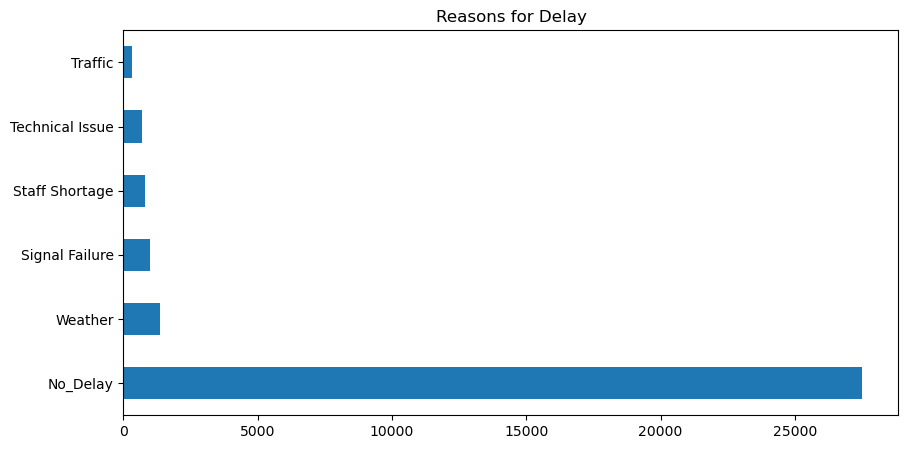

In [18]:
# Strip any leading/trailing whitespace from column names just in case
df.columns = df.columns.str.strip()

# Step 1: Normalize text in the 'reason_for_delay' column
df['reason_for_delay'] = df['reason_for_delay'].str.strip().str.lower()

# Step 2: Map similar reasons to a unified label
standardize_reasons = {
    'signal failure': 'Signal Failure',
    'weather': 'Weather',
    'weather conditions': 'Weather',
    'staffing': 'Staff Shortage',
    'staff shortage': 'Staff Shortage',
    'technical issue': 'Technical Issue',
    'technical fault': 'Technical Issue',
    'mechanical fault': 'Technical Issue',
    'late departure': 'Scheduling',
    # Add more mappings as needed
}

# Apply the mapping
df['reason_for_delay'] = df['reason_for_delay'].replace(standardize_reasons)

# Optional: Capitalize each word for nicer display
df['reason_for_delay'] = df['reason_for_delay'].str.title()

# Step 3: Plot
df['reason_for_delay'].value_counts().plot(kind='barh', figsize=(10, 5), title="Reasons for Delay")


In [17]:
print(df.columns.tolist())


['transaction_id', 'date_of_purchase', 'time_of_purchase', 'purchase_type', 'payment_method', 'railcard', 'ticket_class', 'ticket_type', 'price', 'departure_station', 'arrival_destination', 'date_of_journey', 'departure_time', 'arrival_time', 'actual_arrival_time', 'journey_status', 'reason_for_delay', 'refund_request', 'canceled_trip']


# Data Cleaning

In [11]:
import pandas as pd

# 1. Read the data
df = pd.read_csv("C:/Users/yakou/Downloads/railway.csv", sep=';')

# 2. Standardize column headers early
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 3. Convert date and time columns to database-friendly formats
df['date_of_purchase'] = pd.to_datetime(df['date_of_purchase'], dayfirst=True).dt.strftime('%Y-%m-%d')
df['time_of_purchase'] = pd.to_datetime(df['time_of_purchase']).dt.strftime('%H:%M:%S')
df['date_of_journey'] = pd.to_datetime(df['date_of_journey'], dayfirst=True).dt.strftime('%Y-%m-%d')
df['departure_time'] = pd.to_datetime(df['departure_time']).dt.strftime('%H:%M:%S')
df['arrival_time'] = pd.to_datetime(df['arrival_time']).dt.strftime('%H:%M:%S')
df['actual_arrival_time'] = pd.to_datetime(df['actual_arrival_time'], errors='coerce').dt.strftime('%H:%M:%S')

# 4. Identify canceled trips
df['canceled_trip'] = df['journey_status'].str.lower().str.contains('cancelled', na=False)

# 5. Fill missing delay reasons for on-time trips
df['journey_status'] = df['journey_status'].str.lower()
df['reason_for_delay'] = df.apply(
    lambda x: 'no_delay' if x['journey_status'] == 'on time' and pd.isna(x['reason_for_delay']) else x['reason_for_delay'],
    axis=1
)

# 6. Fill missing refund requests
df['refund_request'] = df['refund_request'].fillna('no_cancelation')

# 7. Standardize values in reason_for_delay
df['reason_for_delay'] = df['reason_for_delay'].replace({
    'staff shortage': 'staffing',
    'Staff shortage': 'staffing',
    'weather conditions': 'weather',
    'Weather conditions': 'weather'
})

# 8. Handle actual arrival time for canceled trips
df['actual_arrival_time'] = df.apply(
    lambda x: 'no arrival' if x['canceled_trip'] else x['actual_arrival_time'],
    axis=1
)

# 9. Lowercase only proper text fields (not date/time)
text_columns = [
    'purchase_type', 'payment_method', 'railcard', 'ticket_class', 'ticket_type',
    'departure_station', 'arrival_station', 'journey_status', 'reason_for_delay', 'refund_request'
]
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower()

# Final check
print(df.head())


            transaction_id date_of_purchase time_of_purchase purchase_type  \
0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        online   
1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       station   
2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        online   
3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       station   
4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        online   

  payment_method railcard ticket_class ticket_type  price  \
0    contactless    adult     standard     advance     43   
1    credit card    adult     standard     advance     23   
2    credit card     none     standard     advance      3   
3    credit card     none     standard     advance     13   
4    contactless     none     standard     advance     76   

       departure_station    arrival_destination date_of_journey  \
0      london paddington  Liverpool Lime Street      2024-01-01   
1     london kings cross      